# Lab work #1
# First Name, Last Name
# Group No

# List of source datasets
1. [Car Price Dataset](https://www.kaggle.com/datasets/asinow/car-price-dataset)
2. [Diabetes Dataset](https://www.kaggle.com/datasets/asinow/diabetes-dataset)
3. [U.S Post College Salaries](https://www.kaggle.com/datasets/rathoddharmendra/post-college-salaries)
4. [Red Wine Quality](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)
5. [Arrest Data in Los Angeles](https://www.kaggle.com/datasets/arsri1/arrest-data-in-los-angeles)
6. [Daily Climate time series data](https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data)
7. [Digital Literacy Education Dataset](https://www.kaggle.com/datasets/ziya07/digital-literacy-education-dataset)
8. [Global Country Information Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023)
9. [College Basketball Dataset](https://www.kaggle.com/datasets/andrewsundberg/college-basketball-dataset)
10. [Pulsar Dataset HTRU2](https://www.kaggle.com/datasets/charitarth/pulsar-dataset-htru2)
11. [Travel Review Rating Dataset](https://www.kaggle.com/datasets/wirachleelakiatiwong/travel-review-rating-dataset)
12. [School Attendance by District 2021-2022](https://www.kaggle.com/datasets/usmanlovescode/school-attendance-b-district-2021-2022)

## Task 1: Data Cleaning and Preparation
**Objective:** Clean and prepare a dataset for analysis.

**Instructions:**
1. Load a dataset of your choice (from proposed Datasets).
2. Handle missing values by either removing them or imputing with appropriate values.
3. Remove any duplicate rows.
4. Convert categorical variables into numerical format using techniques like one-hot encoding (but be aware of sparse and non-sparse one-hot encoding).
5. Normalize or standardize numerical features.
6. Save the cleaned dataset to a new CSV file.

In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
df = pd.read_csv('DailyDelhiClimateTrain.csv')

https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [85]:
# Initial inspection
df.head(), df.info(), df.isnull().sum(), df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


(         date   meantemp   humidity  wind_speed  meanpressure
 0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
 1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
 2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
 3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
 4  2013-01-05   6.000000  86.833333    3.700000   1016.500000,
 None,
 date            0
 meantemp        0
 humidity        0
 wind_speed      0
 meanpressure    0
 dtype: int64,
 0)

In [86]:
# Step 2: Handle missing values
# Check for missing values
missing_values = df.isnull().sum()

if (missing_values > 0).any():
	# Fill missing numerical values with mean
	df['meantemp'] = df['meantemp'].fillna(df['meantemp'].mean())
	df['humidity'] = df['humidity'].fillna(df['humidity'].mean())
	df['wind_speed'] = df['wind_speed'].fillna(df['wind_speed'].mean())
	df['meanpressure'] = df['meanpressure'].fillna(df['meanpressure'].mean())
	print("Fill missing numerical values with mean")
	print(missing_values)
else:
	print("Missing values not found")

Missing values not found


In [87]:
# Step 3: Remove duplicate rows
duplicated_rows = df.duplicated().sum()

if (duplicated_rows > 0).any():
	df = df.drop_duplicates()
	print("Removed duplicate rows:")
	print(duplicated_rows)
else:
	print("Duplicate rows not found")

Duplicate rows not found


In [88]:
# Step 4: Convert categorical variables into numerical
# In this dataset, only 'date' is non-numerical, and it is a datetime type
# So we convert it to datetime format and extract useful features
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_year'] = df['date'].dt.dayofyear

# Drop the original date column
df = df.drop(columns=['date'])

In [89]:
# Step 5: Normalize or standardize numerical features
scaler = StandardScaler()
numerical_columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [90]:
# Іnspection
df.head(), df.info(), df.isnull().sum(), df.duplicated().sum(), df[numerical_columns].mean(), df[numerical_columns].std()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
 4   year          1462 non-null   int32  
 5   month         1462 non-null   int32  
 6   day           1462 non-null   int32  
 7   day_of_year   1462 non-null   int32  
dtypes: float64(4), int32(4)
memory usage: 68.7 KB


(   meantemp  humidity  wind_speed  meanpressure  year  month  day  day_of_year
 0 -2.109500  1.415439   -1.491699      0.025321  2013      1    1            1
 1 -2.463454  1.862828   -0.838196      0.037162  2013      1    2            2
 2 -2.495219  1.564569   -0.475626      0.041972  2013      1    3            3
 3 -2.291015  0.630022   -1.221233      0.033647  2013      1    4            4
 4 -2.654044  1.554627   -0.680303      0.029946  2013      1    5            5,
 None,
 meantemp        0
 humidity        0
 wind_speed      0
 meanpressure    0
 year            0
 month           0
 day             0
 day_of_year     0
 dtype: int64,
 0,
 meantemp       -1.458022e-17
 humidity        1.968330e-16
 wind_speed     -1.944029e-16
 meanpressure   -5.880689e-16
 dtype: float64,
 meantemp        1.000342
 humidity        1.000342
 wind_speed      1.000342
 meanpressure    1.000342
 dtype: float64)

In [91]:
# Step 6: Save the cleaned dataset
df.to_csv('DailyDelhiClimateTrain_cleaned.csv', index=False)

## Task 2: Exploratory Data Analysis (EDA)
**Objective:** Perform exploratory data analysis to understand the dataset.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Calculate basic statistics (mean, median, mode, standard deviation) for numerical features.
3. Visualize the distribution of numerical features using histograms and box plots.
4. Create scatter plots to visualize relationships between pairs of numerical features.
5. Use Seaborn to create a pair plot or heatmap to visualize correlations between features.
6. Summarize your findings in a short report.

In [92]:
# Step 2: Basic statistics
# Calculate basic statistics
print("Mean:\n", df.mean(numeric_only=True), sep = '')
print("\nMedian:\n", df.median(numeric_only=True), sep = '')
print("\nMode:\n", df.mode(numeric_only=True).iloc[0], sep = '')
print("\nStandard Deviation:\n", df.std(numeric_only=True), sep = '')

Mean:
meantemp       -1.458022e-17
humidity        1.968330e-16
wind_speed     -1.944029e-16
meanpressure   -5.880689e-16
year            2.014503e+03
month           6.519152e+00
day             1.571956e+01
day_of_year     1.830007e+02
dtype: float64

Median:
meantemp           0.302054
humidity           0.110553
wind_speed        -0.127311
meanpressure      -0.014104
year            2015.000000
month              7.000000
day               16.000000
day_of_year      183.000000
dtype: float64

Mode:
meantemp           0.749358
humidity           0.282052
wind_speed        -1.491699
meanpressure       0.027171
year            2016.000000
month              1.000000
day                1.000000
day_of_year        1.000000
Name: 0, dtype: float64

Standard Deviation:
meantemp          1.000342
humidity          1.000342
wind_speed        1.000342
meanpressure      1.000342
year              1.120248
month             3.451727
day               8.808520
day_of_year     105.546176
dtype: 

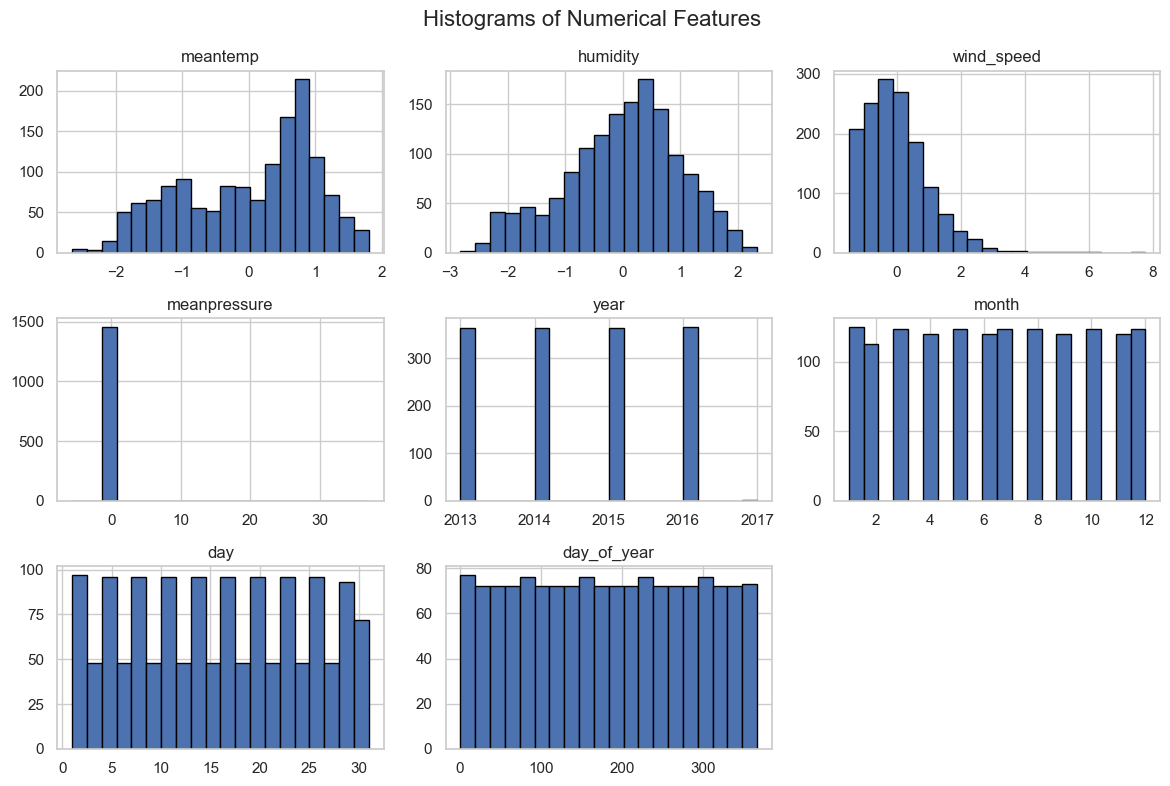

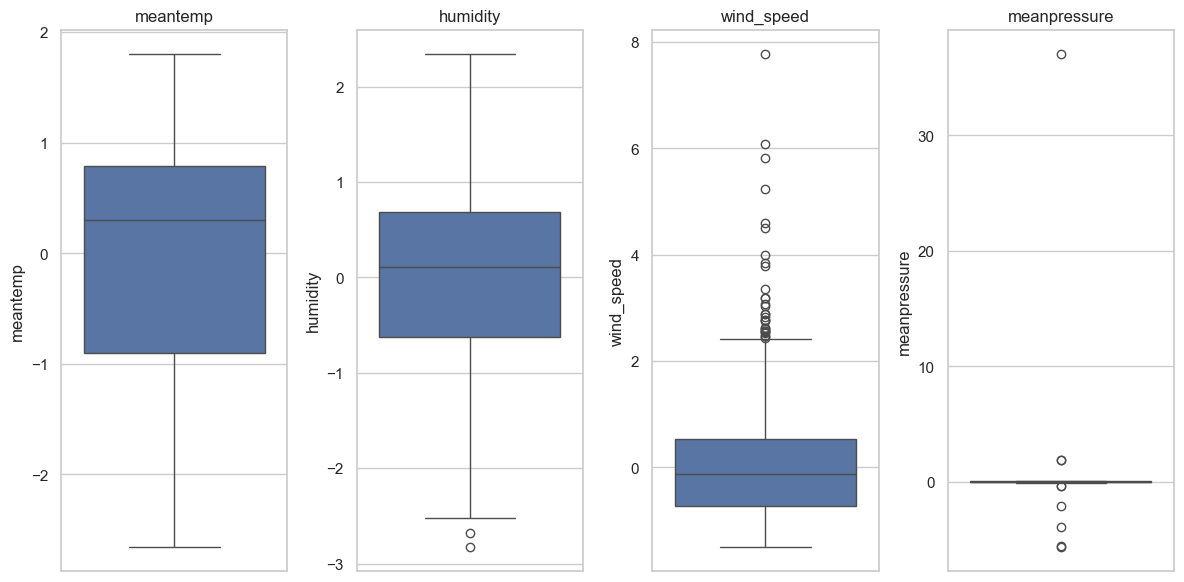

In [93]:
# Step 3: Histograms and Box Plots
# Set style
sns.set_theme(style="whitegrid")

# Plot histograms
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['meantemp', 'humidity', 'wind_speed', 'meanpressure']):
    plt.subplot(1, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()	
plt.show()

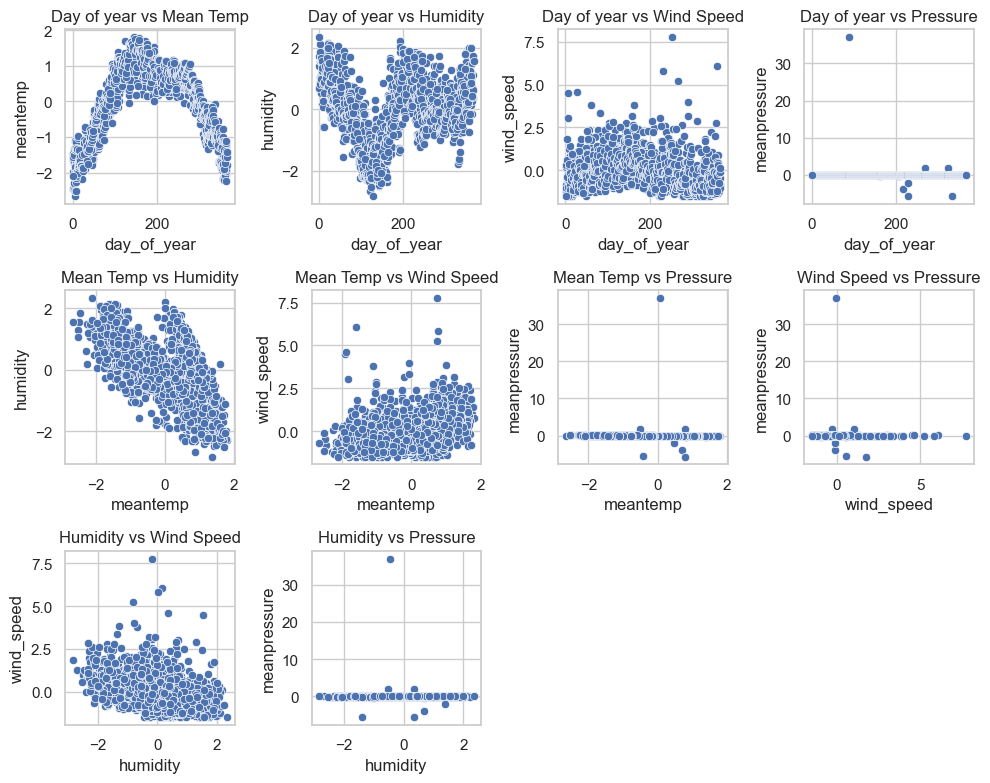

In [94]:
# Step 4: Scatter Plots Between Pairs
# Create scatter plots between selected pairs of features
plt.figure(figsize=(10, 8))

w = 3; h = 4; i = 0;

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='day_of_year', y='meantemp', data=df)
plt.title("Day of year vs Mean Temp")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='day_of_year', y='humidity', data=df)
plt.title("Day of year vs Humidity")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='day_of_year', y='wind_speed', data=df)
plt.title("Day of year vs Wind Speed")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='day_of_year', y='meanpressure', data=df)
plt.title("Day of year vs Pressure")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='meantemp', y='humidity', data=df)
plt.title("Mean Temp vs Humidity")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='meantemp', y='wind_speed', data=df)
plt.title("Mean Temp vs Wind Speed")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='meantemp', y='meanpressure', data=df)
plt.title("Mean Temp vs Pressure")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='wind_speed', y='meanpressure', data=df)
plt.title("Wind Speed vs Pressure")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='humidity', y='wind_speed', data=df)
plt.title("Humidity vs Wind Speed")

i += 1
plt.subplot(w, h, i)
sns.scatterplot(x='humidity', y='meanpressure', data=df)
plt.title("Humidity vs Pressure")

plt.tight_layout()
plt.show()


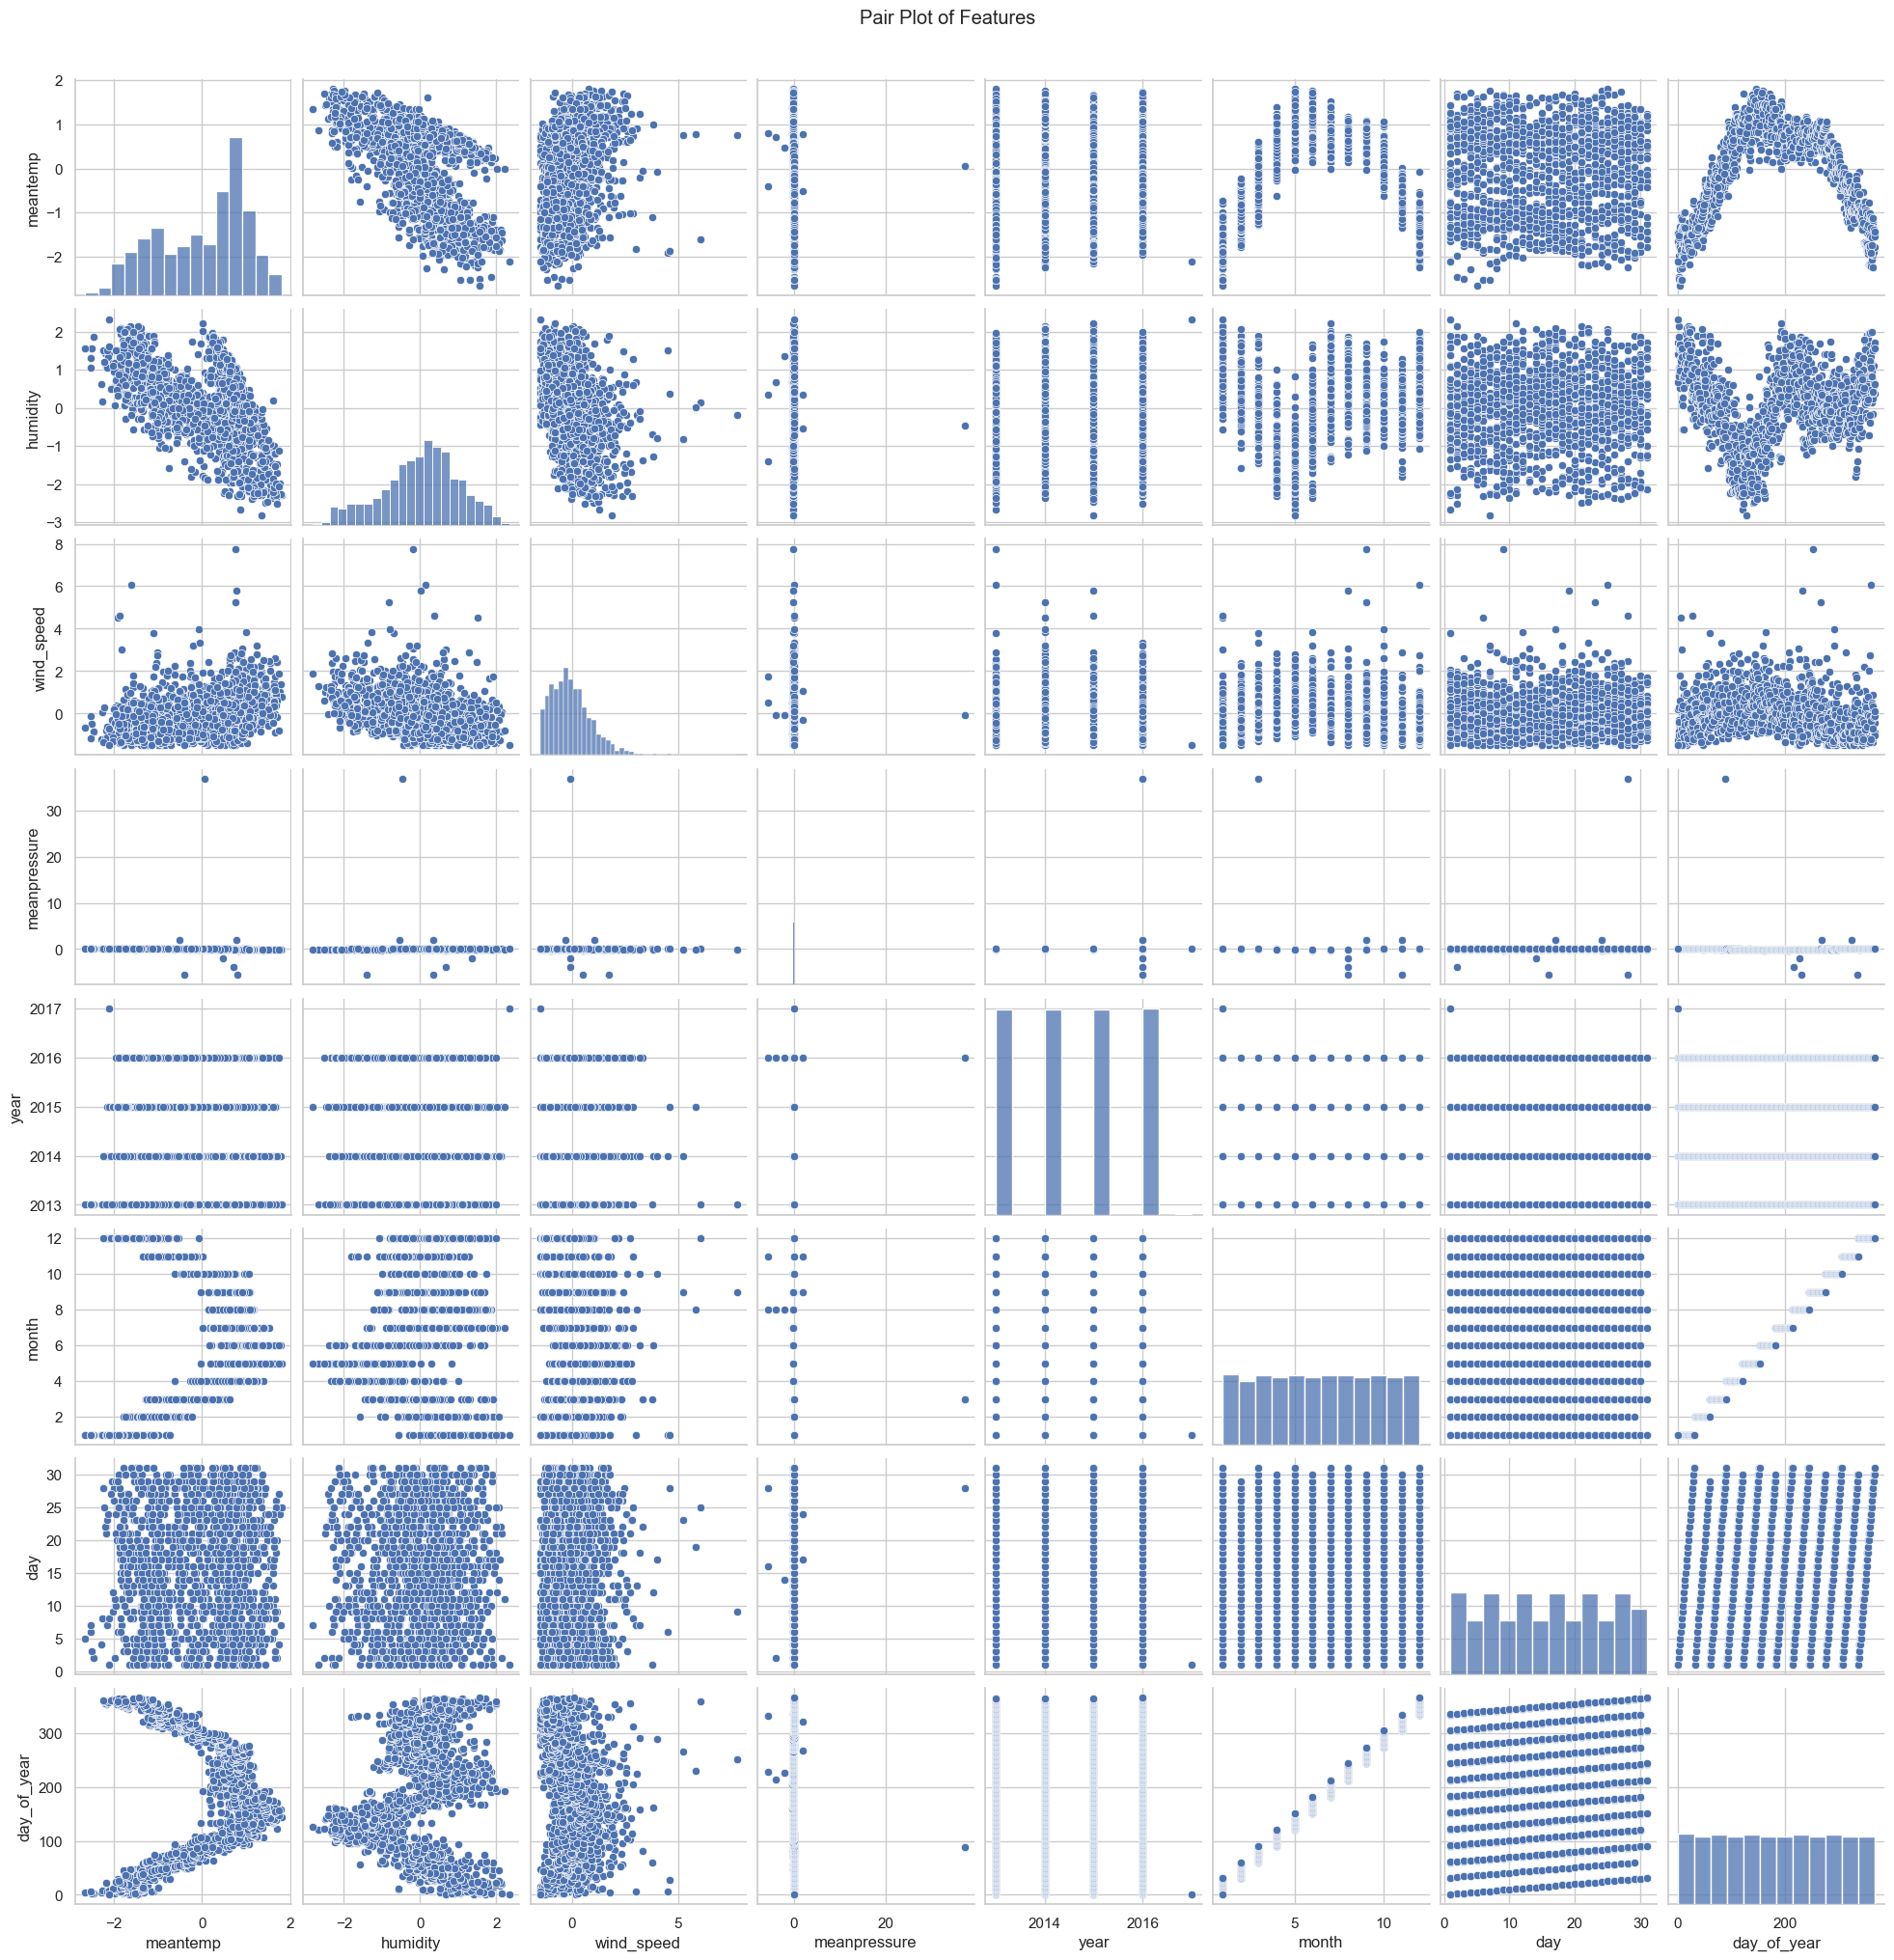

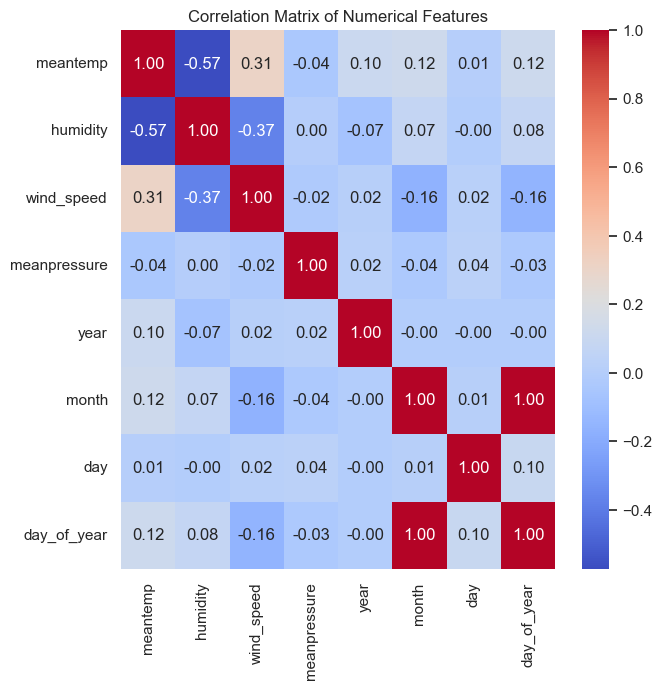

In [95]:
#Step 5: Pair Plot and Heatmap
# Pair plot of all numerical features
sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure', 'year', 'month', 'day', 'day_of_year']])
plt.suptitle("Pair Plot of Features", y=1.02)
plt.show()

# Correlation heatmap
plt.figure(figsize=(7, 7))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()


### Summary Report

1. **Basic statistics**:
	1. **Mean and Median**:
		* **Mean temperatures**, humidity, wind speed, and pressure (after standardization) have values close to **0**, indicating proper scaling.
		* The **Median** is also close to **0**, which means that the distributions are symmetrical and do not have significant skews.
		* The `year`, `month`, `day`, `day_of_year` attributes were not scaled, so the mean and median values indicate uniform coverage of time periods (e.g., the mean year is ≈ 2015).

	2. **Mode**:
		* **Mode** for `day`, `month`, and `day_of_year` is **1**, which means that the first days of the year are most frequent in the sample.
		* For normalized features such as `wind_speed`, the mode value indicates the presence of **repeated low values** typical of Delhi weather in certain seasons.

	3. **Standard Deviation**:
		* The standard deviation for `meantemp', `humidity', `wind_speed' and `meanpressure' is close to **1**, as expected after standard scaling (`StandardScaler').
		* The high deviation values for `day_of_year' (≈105) indicate a **wide spread** of dates (1-365), which is also natural.

	4. **General observations**:
		* After pre-processing, the data have a **stable structure without significant distortions**.
		* All the main numerical features are well prepared for further analysis or modeling.
		* Symmetry of distributions facilitates interpretation of models and avoids unnecessary transformations.

2. **Distributions**:
	- Histograms show that `wind_speed` is skewed right (many values near 0).
	- `meanpressure` and `humidity` are distributed close to normal.

3. **Box Plots**:
	- `wind_speed` contains several outliers on the higher end.
	- `meanpressure` contains several outliers with a large spread.
	- Other variables show relatively few outliers.

4. **Relationships**:
	- Moderate positive correlation between `meantemp`, `humidity`, `wind_speed`.
	- Weak or absent correlation between `meanpressure` and other variables.
	- Weak correlation between `day_of_year` (`month`) and other variables.

5. **Conclusion**:
	- Data is clean and ready for modeling.
	- Potential predictors include `humidity` and `wind_speed` for temperature prediction.

## Task 3: Feature Engineering
**Objective:** Create new features to improve the dataset's predictive power.

**Instructions:**
1. Use the cleaned dataset from Task 1.
2. Create new features based on existing ones (e.g., age groups, interaction terms).
3. Use domain knowledge to generate meaningful features.
4. Analyze the impact of the new features on the dataset's distribution and correlations.
5. Visualize the new features using appropriate plots.

In [96]:
# Step 2: Create new features based on existing ones
# Create interaction term: temperature * humidity
df['temp_humidity_interaction'] = df['meantemp'] * df['humidity']

In [97]:
# Step 3: Use domain knowledge to generate meaningful features
# Feature: Humidity per temperature unit (represents "moisture efficiency")
df['humidity_per_temp'] = df['humidity'] / (df['meantemp'] + 1e-5)  # Avoid division by zero

# Feature: Wind impact on pressure (may indicate turbulence or storm activity)
df['wind_pressure_force'] = df['wind_speed'] * df['meanpressure']

# Feature: Is winter (based on northern hemisphere months)
df['is_winter'] = df['month'].apply(lambda x: 1 if x in [12, 1, 2] else 0)


In [98]:
# Step 4: Analyze the impact of the new features
# Show correlation matrix for all numerical columns
correlation_matrix = df.corr(numeric_only=True)

print(
    "Correlation Matrix with New Features:\n", correlation_matrix[[
        'meantemp', 'humidity', 'temp_humidity_interaction',
        'humidity_per_temp', 'wind_pressure_force', 'is_winter', 'day_of_year'
    ]])

# Show summary statistics for new features
print("\nSummary Statistics for New Features:")
print(df[[
    'temp_humidity_interaction', 'humidity_per_temp', 'wind_pressure_force',
    'is_winter'
]].describe())


Correlation Matrix with New Features:
                                meantemp  humidity  temp_humidity_interaction  \
meantemp                   1.000000e+00 -0.571951                   0.133333   
humidity                  -5.719507e-01  1.000000                   0.193932   
wind_speed                 3.064677e-01 -0.373972                  -0.055578   
meanpressure              -3.881818e-02  0.001734                  -0.001840   
year                       1.038034e-01 -0.071381                   0.023007   
month                      1.226667e-01  0.074950                   0.301712   
day                        6.475411e-03 -0.001905                   0.020998   
day_of_year                1.196941e-01  0.076371                   0.301906   
temp_humidity_interaction  1.333335e-01  0.193932                   1.000000   
humidity_per_temp         -3.681329e-07  0.086190                   0.028280   
wind_pressure_force       -3.652687e-02  0.033729                   0.019191   
i

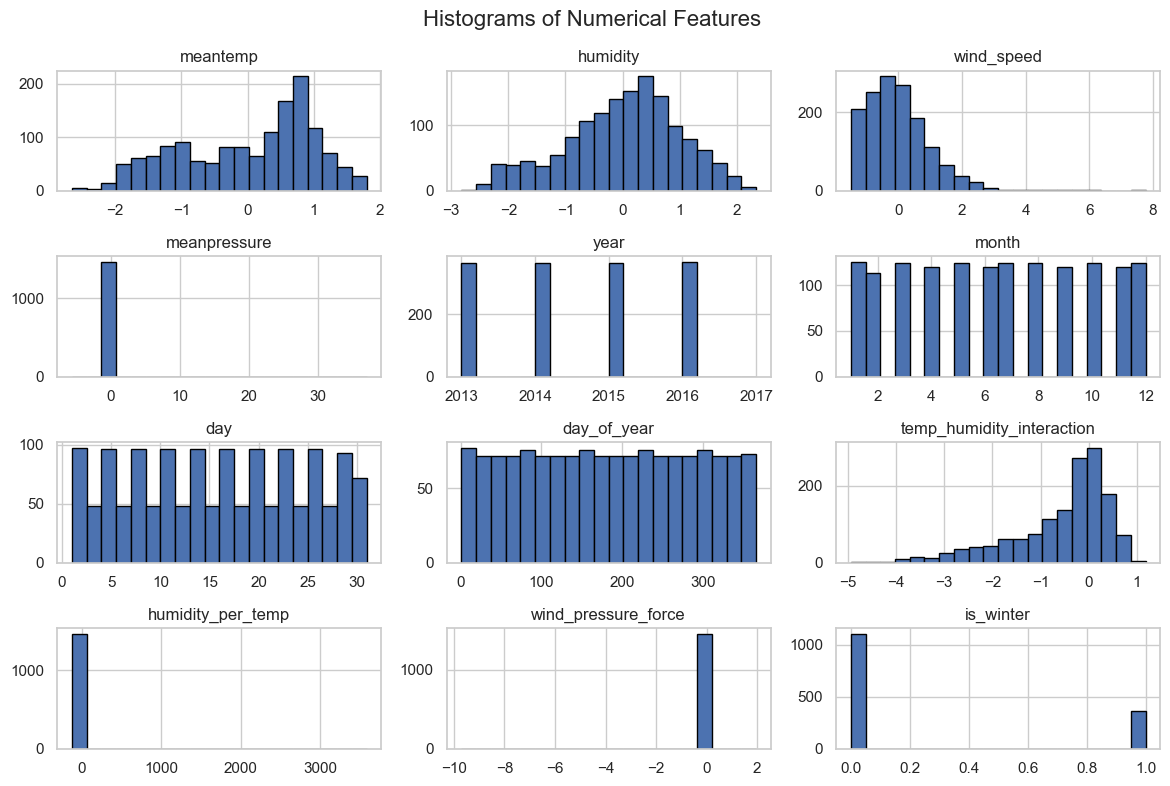

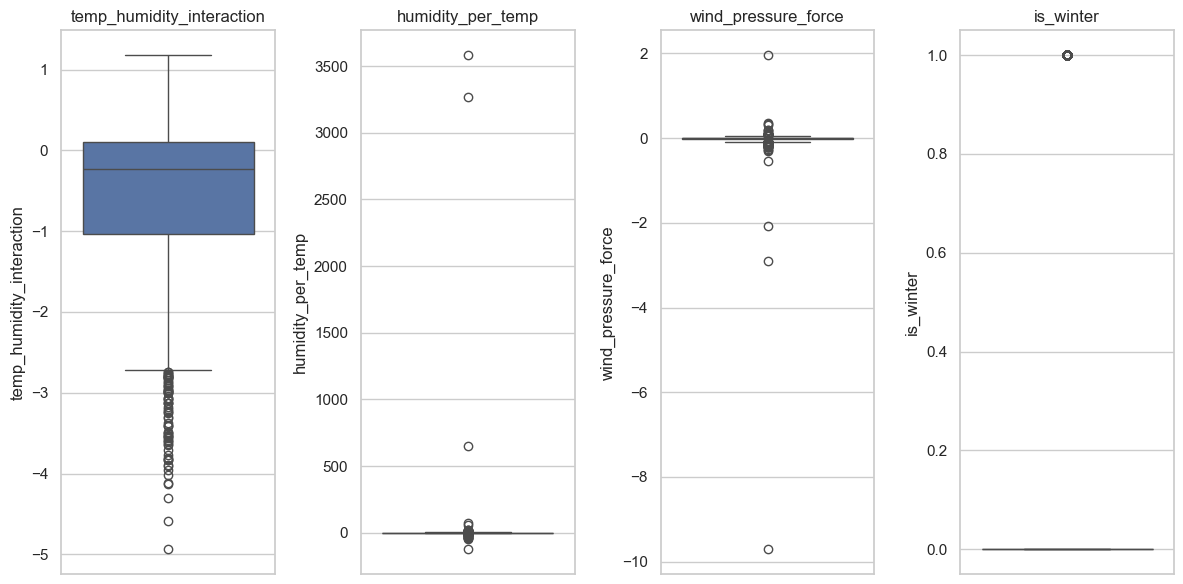

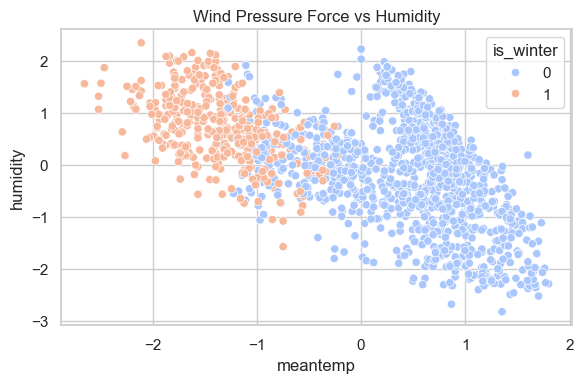

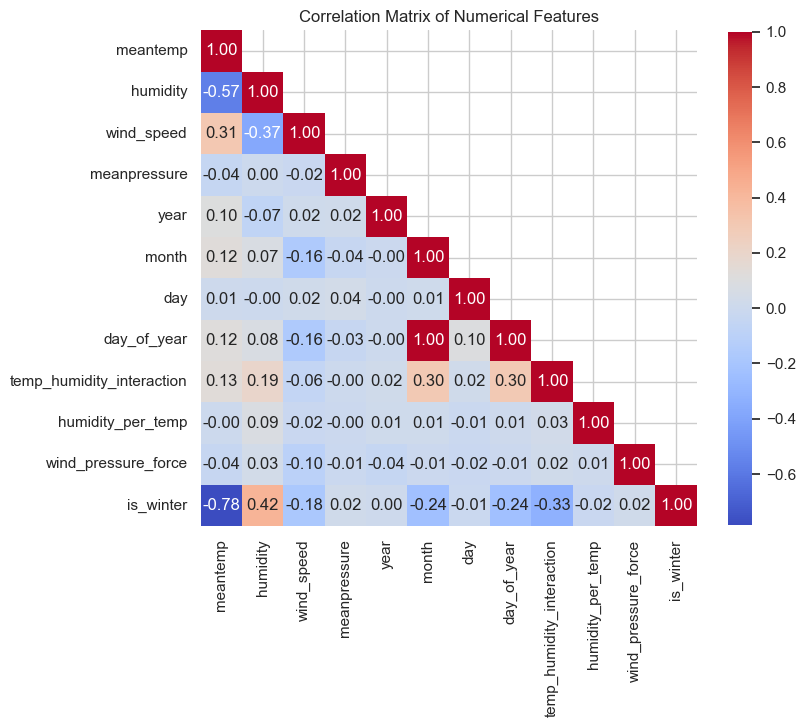

In [99]:
# Step 5: Visualize the new features using appropriate plots
# Histogram of temp_humidity_interaction

# Set style
sns.set_theme(style="whitegrid")

# Plot histograms
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Plot box plots
plt.figure(figsize=(12, 6))
for i, col in enumerate(['temp_humidity_interaction', 'humidity_per_temp', 'wind_pressure_force', 'is_winter']):
	plt.subplot(1, 4, i + 1)
	sns.boxplot(y=df[col])
	plt.title(col)
plt.tight_layout()
plt.show()

# Scatter plot: humidity vs mean temperature
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='meantemp', y='humidity', hue='is_winter', palette='coolwarm')
plt.title("Wind Pressure Force vs Humidity")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask, square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix of Numerical Features")
plt.show()

In [100]:
#Save the cleaned dataset
df.to_csv('DailyDelhiClimateTrain_cleaned2.csv', index=False)

## Task 4: Data Visualization
**Objective:** Create insightful visualizations to communicate findings.

**Instructions:**
1. Use the dataset with new features from Task 3.
2. Create a bar chart to compare categorical features.
3. Use a line plot to show trends over time (if applicable).
4. Create a heatmap to visualize correlations between features.
5. Use Seaborn to create a violin plot or swarm plot to compare distributions across categories.
6. Combine multiple plots into a single figure using Matplotlib's subplot functionality.

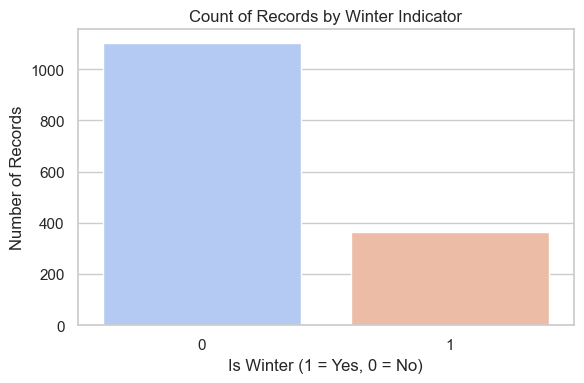

In [111]:
# Step 2: Create a bar chart to compare categorical features (e.g., is_winter counts)
plt.figure(figsize=(6, 4))
sns.countplot(x='is_winter', data=df, palette='coolwarm', hue='is_winter', legend=False)
plt.title("Count of Records by Winter Indicator")
plt.xlabel("Is Winter (1 = Yes, 0 = No)")
plt.ylabel("Number of Records")
plt.tight_layout()
plt.show()

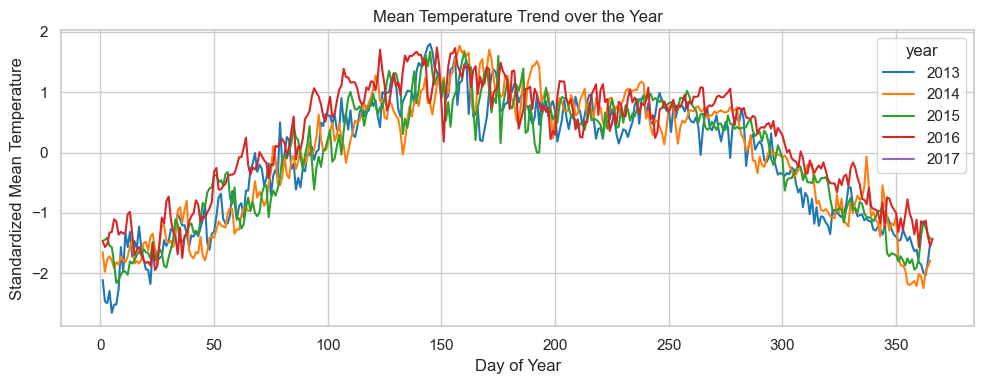

In [112]:
# Step 3: Use a line plot to show trends over time (e.g., mean temperature across days)
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='day_of_year', y='meantemp', hue='year', palette='tab10')
plt.title("Mean Temperature Trend over the Year")
plt.xlabel("Day of Year")
plt.ylabel("Standardized Mean Temperature")
plt.tight_layout()
plt.show()

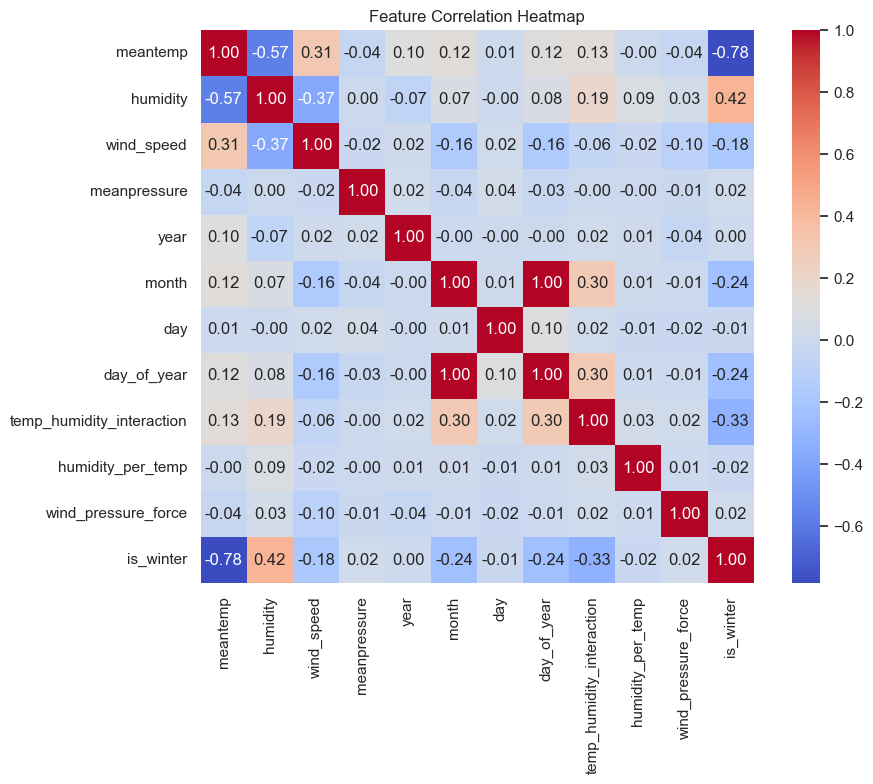

In [114]:
# Step 4: Create a heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

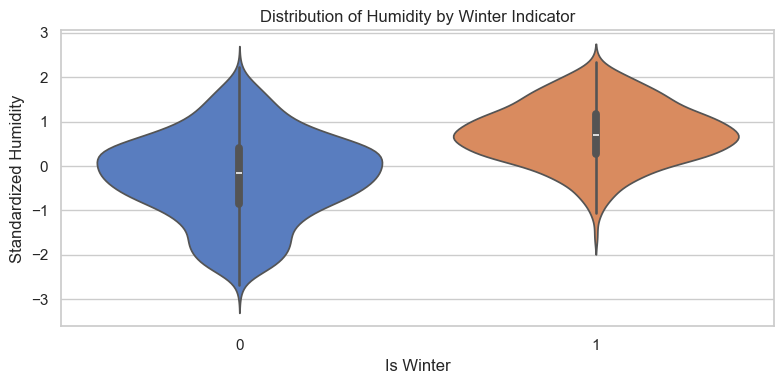

In [116]:
# Step 5: Create a violin plot to compare distributions across categories
plt.figure(figsize=(8, 4))
sns.violinplot(x='is_winter', y='humidity', data=df, palette='muted', hue='is_winter', legend=False)
plt.title("Distribution of Humidity by Winter Indicator")
plt.xlabel("Is Winter")
plt.ylabel("Standardized Humidity")
plt.tight_layout()
plt.show()

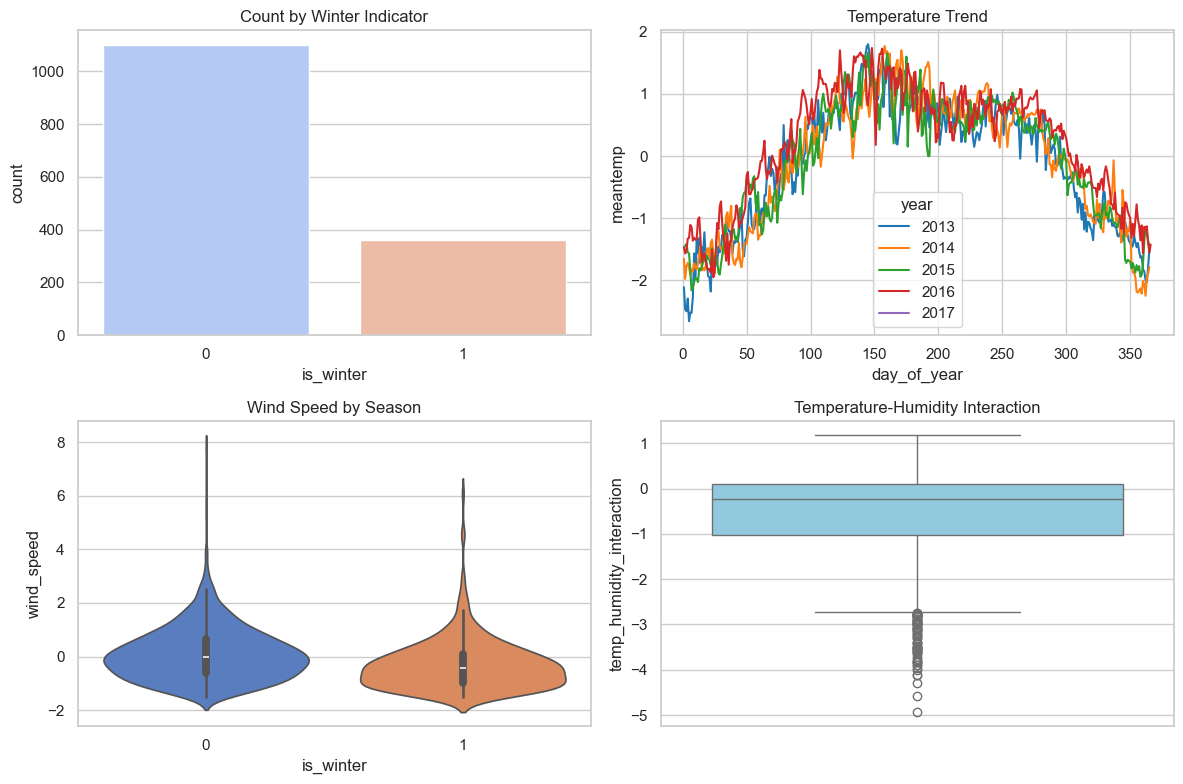

In [122]:
# Step 6: Combine multiple plots into a single figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Subplot 1: Bar chart
sns.countplot(ax=axes[0, 0], x='is_winter', data=df, palette='coolwarm', hue='is_winter', legend=False)
axes[0, 0].set_title("Count by Winter Indicator")

# Subplot 2: Line plot
sns.lineplot(ax=axes[0, 1], data=df, x='day_of_year', y='meantemp', hue='year', palette='tab10')
axes[0, 1].set_title("Temperature Trend")

# Subplot 3: Violin plot
sns.violinplot(ax=axes[1, 0], x='is_winter', y='wind_speed', data=df, palette='muted', hue='is_winter', legend=False)
axes[1, 0].set_title("Wind Speed by Season")

# Subplot 4: Boxplot of temp_humidity_interaction
sns.boxplot(ax=axes[1, 1], y='temp_humidity_interaction', data=df, color='skyblue')
axes[1, 1].set_title("Temperature-Humidity Interaction")

plt.tight_layout()
plt.show()